# Assignment on Logistic Regression

***

# Instructions
### In this Assignment you have Share Market Dataset to train Logistic Regression Model
- This data set consist of percentage return on five previous days as Lag1 to Lag5 and today.
- This data also consist 'Volume' of Shares traded previous day and also 'Direction' of the stock for today.
- For this excercise, 'Direction' is Target/Output/dependent variable(y) and rest all are independent variables(x).
- Data set is span over 2001 to 2005.

***

# Questions
- <a href="#question1"> Question-1 (Summary and Visualization) </a>
- <a href="#question2"> Question-2 (Binary Classification-I)  </a>
- <a href="#question3"> Question-3 (Binary Classification-II) </a>

***
#### Import libraries here you need to solve this Assignment:

In [1]:
# Importing libraries to be used.

import pandas as pd   # To use funcions used in training a model and for data cleaning
import numpy as np    # For calculation purpose 
import seaborn as sns   # For plotting graphs
from sklearn.metrics import r2_score   # To calculate r2 value of the model
from sklearn.model_selection import train_test_split # To split the data into training set and testing set
import matplotlib.pyplot as plt  # For plotting graphs
from scipy.optimize import minimize   # for minimizing the function or cost function
from sklearn.metrics import confusion_matrix   # To make confusion matrx of the dataset

## Load the dataset

In [72]:
# Reading a csv file.

data = pd.read_csv("Smarket.csv")
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [73]:
# Getting all the information of data frame like column names, data types of columns, data types of data frame etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


***

<a id='question1'></a>
<font color='red' size=5>Question-1 (Summary and Visualization)</font>
1. Is there any missing or duplicate row present in 'Smarket.csv' file. If yes then mention those rows and delete them.
2. Draw pairplot and heatmap between features.
3. Comment which features have significant correlation (95% significant::0.35).
4. Drop a feature if there is high correlation among two or more features.

# 1.a Checking for missing values

In [4]:
data_null = data[data.isna().any(axis=1)] # Checking for null values

In [5]:
data_null

# As from the result we can say that their are no missing values in the data frame as the table is empty.

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction


# 1.b Checking for duplicate values in the data frame

In [6]:
data_duplicated = data[data.duplicated()] # Checking for duplicate values in the data frame.

In [7]:
data_duplicated

# As from the result we can say that their are no duplicate values in the data frame as the table is empty.

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction


In [75]:
# Changing data in direction column. 
# Up to 1.
# Down to 0.

data["Direction"] = data["Direction"].map({"Up" : 1, "Down" : 0})

# 2.a Pairplot between Features

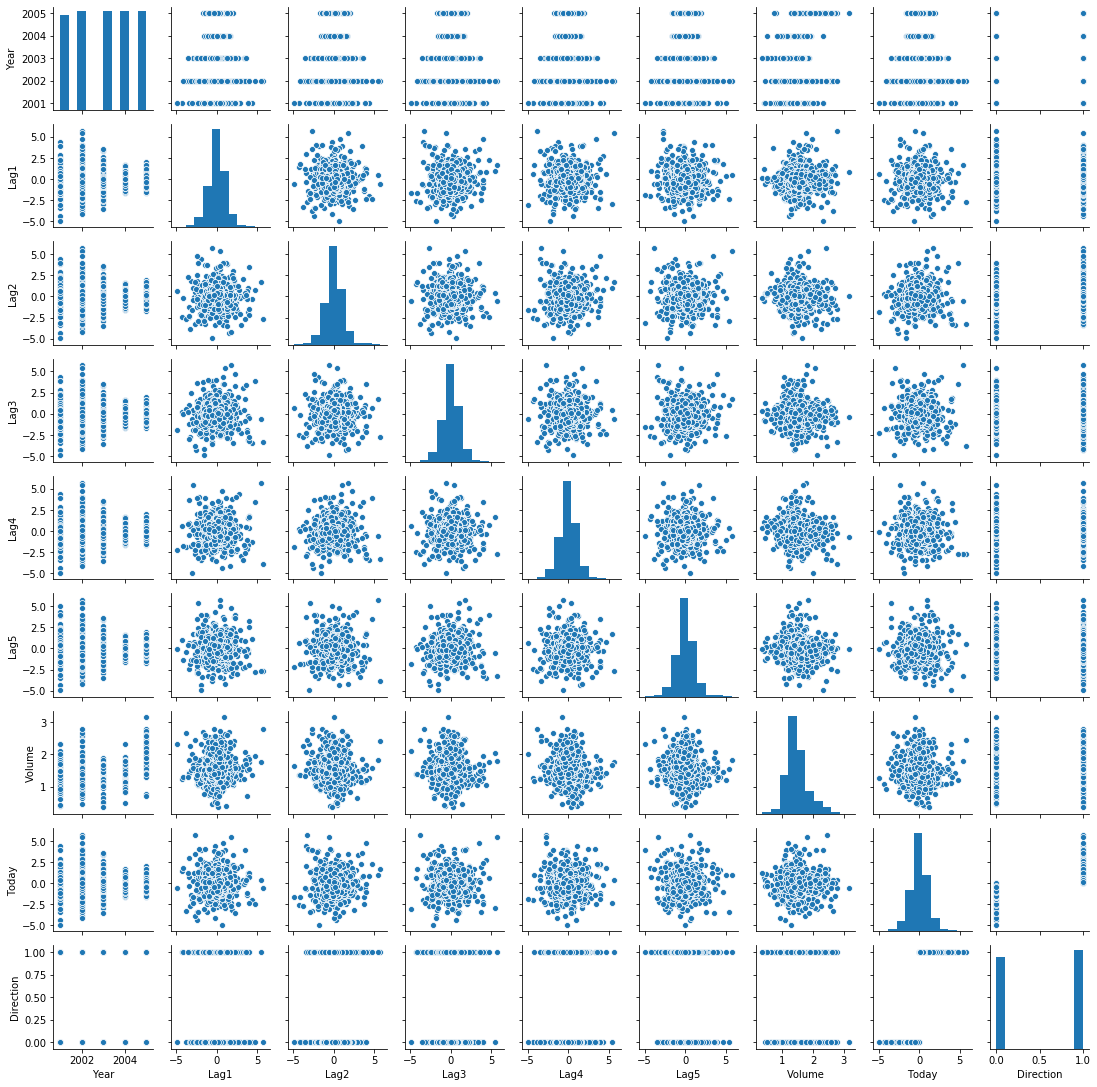

In [9]:
data_pp = sns.pairplot(data)   # Pairplot between all the features in the dataframe
data_pp.fig.set_figheight(15)  # Height of the pairplot set to 15
data_pp.fig.set_figwidth(15)   # Width of the pairplot set to 15
plt.show()

# 2.b Heatmap between features

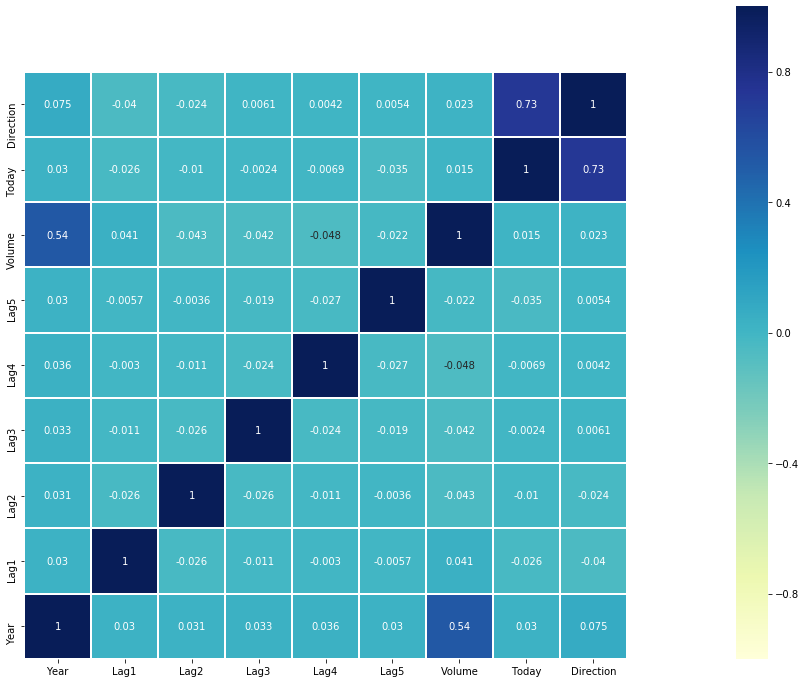

In [10]:
data_c = data.corr()   # Correlation of featurs.
fig, axes = plt.subplots(figsize=(15,12))   # Setting the figure size.
ax = sns.heatmap(data_c, vmin = -1, vmax = 1, annot = True, ax = axes, cmap="YlGnBu", linewidth=0.9) 
#plotting heat map with min to max range is -1 to 1.
ax.set_xlim(0,10)  # Setting xlimit to 10.
ax.set_ylim(0,10)  # Setting ylimit to 10.
plt.show()

# 3. Which features has significant Correlation (95%::0.35)

1. 'Volume' and 'Year' has correlation of 0.54.
2. 'Today' and 'Direction' has highest correlation of 0.73

* Assumptions.

1. Since 'Volume' is a continuous data and 'Year' is categorical data so we can say that they have correlation but not significant.
2. There are not any missing and duplicate values.
3. By seeing the pairplot we can say that 'Direction' and 'Year' has categorical data and other than that other features has continuous data

# 4. Dropping feature 

In [11]:
# Dropping 'Volume' column becuase this column has correlation of 0.54 with 'Year' column.
# Also 'Year' is a categorical data.

data=data.drop(["Year"], axis=1)

***

<a id='question2'></a>
<font color='red' size=5> Question-2 (Binary Classification-I)</font>
#### For implementation of this question, use selected features from previous question.
1. Split data into train set and test set with test_size = 0.75
2. Fit the Logistic Regression Model between selected features and 'Direction'. Here build your own algorithms for computing Sigmoid, Cost-function and Gradient to optimize the coefficients. **[Hint: As explained in the lecture.]**
3. Interpret the models and print accuracy of trained model on test set.
4. Create a confusion matrix for this model to show how many times model predict direction of market stock correctly.

# 1. Splitting data into test and training set

In [12]:
# Splitting data into training set and testing set with test size = 0.75 i.e.
# 75% is test set and 25% is training set.

data_train, data_test = train_test_split(data, test_size = 0.75)

In [13]:
# Printing shape of training data i.e. 25% of the data.

print(data_train.shape)

(312, 8)


In [14]:
# Printing shape of the testing data i.e. 75% of the data.

print(data_test.shape)

(938, 8)


# 2. Logistic Regression Model with target variable as 'Direction'

In [15]:
# Data set with selected columns or features.
# from lag1 to lag5 and also 'Volume' because 'Volume' of Shares traded previous day

In [56]:
data_sel = data.filter(["Lag1","Lag2","Lag3","Lag4","Lag5","Volume","Today","Direction"])

In [57]:
data_sel

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,1
1,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,1
2,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,0
3,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,1
4,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,1
5,0.213,0.614,-0.623,1.032,0.959,1.34910,1.392,1
6,1.392,0.213,0.614,-0.623,1.032,1.44500,-0.403,0
7,-0.403,1.392,0.213,0.614,-0.623,1.40780,0.027,1
8,0.027,-0.403,1.392,0.213,0.614,1.16400,1.303,1
9,1.303,0.027,-0.403,1.392,0.213,1.23260,0.287,1


In [58]:
# Sigmoid function 
# Formula for sigmoid function:- g(x) = 1/1+e^(-x) 

def sigmoid(x):
    return(1/(1+np.exp(-x)))

In [59]:
# Cost Function 
# Formula for cost function:- j = -(1/2m)*(ylog(h)+(1-y)(log(h-y))

def cost_func(beta, x, y):
    m = y.size
    h = sigmoid(x.dot(beta))
    j = -1*(1/(2*m))*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    return j

In [60]:
# Gradient 
# Formula for gradient descent:- grad = (1/2m)*(h-y)*x

def gradient(beta,x,y):
    m = y.size
    h = sigmoid(x.dot(beta.reshape(-1,1)))
    grad = (1/m)*x.T.dot(h-y)
    return grad.flatten()

In [61]:
# Changing type of data frame to 'ndarrays'.

data_array =np.array(data_sel)

In [62]:
# Adding a stack column or bias unit in the data frame
x = np.column_stack((np.ones((len(data_array),1)), data_array[:,:7])) 
y = data_array[:,7]  # Extracting target variable
y = y.reshape(len(y),1)   # reshaping target variable

# Splitting data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.75)

In [63]:
initial_beta = np.zeros(x.shape[1]) # Defining betas 
print("Initial betas are:", initial_beta) # Printing value of betas
print('Cost function at initial betas:', cost_func(initial_beta,x_train,y_train)) # Calling cost_func function
print('Gradient at initial betas:', gradient(initial_beta,x_train,y_train)) # Calling gradient function

Initial betas are: [0. 0. 0. 0. 0. 0. 0. 0.]
Cost function at initial betas: [0.34657359]
Gradient at initial betas: [-0.03205128  0.02733013  0.01638782 -0.0256266  -0.01412981 -0.05599679
 -0.05102615 -0.39577244]


In [64]:
res = minimize(cost_func, initial_beta, args=(x,y), method = None, jac = gradient, options={'maxiter':4000})
# For minimizing the cost error and to calculate the coefficients
beta_trained = res.x
beta_trained = beta_trained.reshape(len(beta_trained),1)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
E:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1 * alpha1 * derphi0) or \
E:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:426: RuntimeWarning: invalid value encountered in greater_equal
  ((phi_a1 >= phi_a0) and (i > 1)):


In [65]:
print(beta_trained) # Printing of values of betas

[[ 0.02441719]
 [-0.12004798]
 [-0.15173409]
 [ 0.08354736]
 [ 0.01404761]
 [ 0.11462962]
 [ 0.12196475]
 [ 6.59927919]]


# 3. Accuracy of the Model

In [66]:
# The predicted and Accuracy of the Model

def pre_and_acc(beta,x,y):
    y_pred = sigmoid(x.dot(beta))
    y_pred1 = list(map(lambda a: round(a), y_pred.flatten()))  # Rounding values greater than threshold to 1 and smaller than threshold to 0
    cc = np.sum(y_pred1 == y.flatten())
    acc = cc*100/y.size
    return y_pred1, acc.round(2)

In [67]:
# Calling the function pre_and_acc to calculate accuracy

y_p, ac = pre_and_acc(beta_trained, x_test, y_test)

In [68]:
# Printing the accuracy of the data set

print(ac)

98.83


# 4. Confusion Matrix

In [69]:
# Confusion matrix of this model to show how many times model predict direction of market stock correctly.

confusion_matrix(y_test, y_p)

array([[445,  11],
       [  0, 482]], dtype=int64)

 1. In the model data set 445 values predicts '1' and 11 values were predicted wrong
 2. In the model data set 482 values predicts '0' and 0 values were predicted wrong


***

<a id='question3'></a>
<font color='red' size=5>Question-3 (Binary Classification-II)</font>
#### Use all features from dataset 'Smarket.csv' file for this question:-
#### Dependent variable is 'Direction' and rest all are independent variables.


1. Train a Classification model by using data from 2000-2004 for training and predict market for 2005.
2. Create a confusion matrix for this model to show how many times model predict direction of market stock correctly.

# 1. Train a Classification model by using data from 2000-2004 for training and predict market for 2005

In [103]:
# Splitting data by 'Year'
# Splitting data of 'Year' from 2000 - 2004 into Training set

data_year_train = data[data["Year"]<2005] # Extracting data from year 2001 to 2004.
data_year_train  # Printing dataset

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,1
5,2001,0.213,0.614,-0.623,1.032,0.959,1.34910,1.392,1
6,2001,1.392,0.213,0.614,-0.623,1.032,1.44500,-0.403,0
7,2001,-0.403,1.392,0.213,0.614,-0.623,1.40780,0.027,1
8,2001,0.027,-0.403,1.392,0.213,0.614,1.16400,1.303,1
9,2001,1.303,0.027,-0.403,1.392,0.213,1.23260,0.287,1


In [104]:
# Splitting data of 'Year' equal to 2005 into Testing  set

data_year_test = data[data["Year"]==2005] # Extracting data by year 2005
data_year_test  # Printing dataset

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
998,2005,-0.134,0.008,-0.007,0.715,-0.431,0.78690,-0.812,0
999,2005,-0.812,-0.134,0.008,-0.007,0.715,1.51080,-1.167,0
1000,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.72100,-0.363,0
1001,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.73890,0.351,1
1002,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.56910,-0.143,0
1003,2005,-0.143,0.351,-0.363,-1.167,-0.812,1.47790,0.342,1
1004,2005,0.342,-0.143,0.351,-0.363,-1.167,1.49040,-0.610,0
1005,2005,-0.610,0.342,-0.143,0.351,-0.363,1.48880,0.398,1
1006,2005,0.398,-0.610,0.342,-0.143,0.351,1.56210,-0.863,0
1007,2005,-0.863,0.398,-0.610,0.342,-0.143,1.51030,0.600,1


In [105]:
data_array_train = np.array(data_year_train) # Converting data into array

In [106]:
data_array_test = np.array(data_year_test) # Converting data into array

In [107]:
# Adding a stack column or bias unit in the data frame
x_new = np.column_stack((np.ones((len(data_array_train),1)), data_array_train[:,1:8])) 
y_new = data_array_train[:,8] # Extracting target variable
y_new = y_new.reshape(len(y_new),1)   # Reshapping the target variable

In [108]:
initial_beta_new = np.zeros(x_new.shape[1])  # Defining new betas for new data
print("Initial betas are:", initial_beta_new) # Printing values of betas
print('Cost function at initial betas:', cost_func(initial_beta_new,x_new,y_new)) # Calling cost_func function for new data
print('Gradient at initial betas:', gradient(initial_beta_new,x_new,y_new)) # Calling gradient function for new data

Initial betas are: [0. 0. 0. 0. 0. 0. 0. 0.]
Cost function at initial betas: [0.34657359]
Gradient at initial betas: [-0.00801603  0.02057114  0.01629459 -0.00389429 -0.00339729  0.00123948
 -0.00880396 -0.45429208]


In [109]:
res_new = minimize(cost_func, initial_beta_new, args=(x_new,y_new), method = None, jac = gradient, options={'maxiter':4000})
# For minimizing the cost error and to calculate the coefficients
beta_trained_new = res_new.x
beta_trained_new = beta_trained_new.reshape(len(beta_trained_new),1)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
E:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1 * alpha1 * derphi0) or \
E:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:426: RuntimeWarning: invalid value encountered in greater_equal
  ((phi_a1 >= phi_a0) and (i > 1)):


In [110]:
print(beta_trained_new) # Printing new values of betas

[[ 0.06463024]
 [-0.04759291]
 [-0.19117688]
 [ 0.08575405]
 [ 0.00845607]
 [ 0.11121694]
 [ 0.03196261]
 [ 7.76293028]]


# 2. Confusion Matrix

In [137]:
# Adding a stack column or bias unit in the data frame
x_n = np.column_stack((np.ones((len(data_array_test),1)), data_array_test[:,1:8])) 
y_n = data_array_test[:,8] # Extracting target variable
y_n = y_n.reshape(len(y_n),1)   # Reshapping the target variable

In [138]:
# Calling the function pre_and_acc to calculate accuracy

y_p_new, ac_new = pre_and_acc(beta_trained_new, x_n, y_n)
print(ac_new) # Printing accuracy

98.81


In [139]:
# Confusion matrix of this model to show how many times model predict direction of market stock correctly.

confusion_matrix(y_n, y_p_new)

array([[108,   3],
       [  0, 141]], dtype=int64)

1. The model predicts 108 '0' values correctly and 3 values were predicted wrong.
2. The model predicts 142 '1' values correctly and 0 values were predicted wrong.

***